In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [1]:
import sys,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import itertools
from itertools import groupby
from matplotlib.patches import FancyBboxPatch
import seaborn as sns
sns.set_style("white")

# Load the survey results

In [2]:
colnames=['Finished','p2p_Filter1','p2p_dem_Gender','p2p_dem__birth','p2p_dem_househ_sit','p2p_dem_househ_size',
          'p2p_dem_househ_kids','p2p_dem_activity','p2p_dem_activity_1_TEXT','p2p_dem_activity_3_TEXT',
          'p2p_dem_activity_4_TEXT','p2p_dem_educ','p2p_dem_politics','P2P_Values_Env_1','P2P_Values_Env_2',
          'P2P_Values_Env_3','P2P_Values_Env_4','P2P_Values_Env_5','p2p_dem2_energy','p2p_dem2_roof',
          'p2p_dem2_roof_3_TEXT','p2p_dem2_space_1','p2p_dem2_levels','p2p_dem3_PV','p2p_dem3_PV_power_1',
          'p2p_dem3_ESS','p2p_dem3_stroage_cap_1','p2p_dem3_technology_1','p2p_dem3_technology_2',
          'p2p_dem3_technology_3','p2p_dem3_technology_4','p2p_check_forecast','p2p_check_forecast2',
          'p2p_willingness','p2p_dec_4c30S_12h','p2p_dec_4c60S_12h','p2p_dec_4c90S_12h','p2p_dec_12c30S_12h',
          'p2p_dec_12c60S_12h','p2p_dec_12c90S_12h','p2p_dec_20c30S_12h','p2p_dec_20c60S_12h','p2p_dec_20c90S_12h',
          'p2p_dec_28c30S_12h','p2p_dec_28c60S_12h','p2p_dec_28c90S_12h','p2p_dec_check1','p2p_dec_4c30s_12h+',
          'p2p_dec_4c60s_12h+','p2p_dec_4c90s_12h+','p2p_dec_12c30s_12h+','p2p_dec_12c60s_12h+','p2p_dec_12c90s_12h+',
          'p2p_dec_20c30s_12h+','p2p_dec_20c60s_12h+','p2p_dec_20c90s_12h+','p2p_dec_28c30s_12h+','p2p_dec_28c60s_12h+',
          'p2p_dec_28c90s_12h+','p2p_dec_check2','p2p_DecMod_1','p2p_DecMod_2','p2p_DecMod_3','p2p_DecMod_4',
          'p2p_Degree_Autonomy','p2p_Willing_particip_2','p2p_Eval_1','p2p_willingn_reasons_1','p2p_willingn_reasons_2',
          'p2p_willingn_reasons_3','p2p_willingn_reasons_4','p2p_willingn_reasons_5','p2p_willingn_reasons_6',
          'p2p_willingn_reasons_7','p2p_willingn_reasons_8','p2p_willingn_reasons_9','p2p_willingn_reasons_10',
          'p2p_willingn_reasons_11','p2p_willingn_reasons_12','p2p_willingn_reasons_13','p2p_willingn_reasons_14',
          'p2p_willingn_reasons_15','p2p_willingn_reasons_15_TEXT','p2p_Willingn_comment','p2p_Nei_Pol',
          'p2p_Nei_attach_1','p2p_Nei_attach_2','p2p_Nei_attach_3','p2p_Nei_attach_6','p2p_Emo_Nei_1','p2p_Emo_Nei_2',
          'p2p_dem4_risk','p2p_Nei_attach_1.0','p2p_Nei_attach_2.0','P2P_CC_Emo_1','P2P_CC_Emo_2','P2P_CC_Emo_3',
          'P2P_CC_Emo_4','P2P_CC_Emo_5','P2P_CC_Emo_6','P2P_CC_Emo_7','P2P_CC_Emo_8','P2P_CC_Emo_9','P2P_CC_Emo_10']

In [3]:
df=pd.read_excel('../Input/P2P_Data_Germany_March2020_completes_200314_uh.xlsx',usecols=colnames)

Filter out the three that did not finish the study

In [4]:
df.shape

(254, 104)

In [5]:
df=df[df.Finished==1]

In [6]:
df.shape

(251, 104)

In [7]:
df=df.reset_index(drop=True)

In [8]:
df.keys()

Index(['Finished', 'p2p_Filter1', 'p2p_dem_Gender', 'p2p_dem__birth',
       'p2p_dem_househ_sit', 'p2p_dem_househ_size', 'p2p_dem_househ_kids',
       'p2p_dem_activity', 'p2p_dem_activity_1_TEXT',
       'p2p_dem_activity_3_TEXT',
       ...
       'P2P_CC_Emo_1', 'P2P_CC_Emo_2', 'P2P_CC_Emo_3', 'P2P_CC_Emo_4',
       'P2P_CC_Emo_5', 'P2P_CC_Emo_6', 'P2P_CC_Emo_7', 'P2P_CC_Emo_8',
       'P2P_CC_Emo_9', 'P2P_CC_Emo_10'],
      dtype='object', length=104)

In [9]:
df.head(2).iloc[:,28:]

,p2p_dem3_technology_2,p2p_dem3_technology_3,p2p_dem3_technology_4,p2p_check_forecast,p2p_check_forecast2,p2p_willingness,p2p_dec_4c30S_12h,p2p_dec_4c60S_12h,p2p_dec_4c90S_12h,p2p_dec_12c30S_12h,...,P2P_CC_Emo_1,P2P_CC_Emo_2,P2P_CC_Emo_3,P2P_CC_Emo_4,P2P_CC_Emo_5,P2P_CC_Emo_6,P2P_CC_Emo_7,P2P_CC_Emo_8,P2P_CC_Emo_9,P2P_CC_Emo_10
0,1,1,1,5,5,2,,,,,...,5,1,6,1,6,2,5,2,4,6
1,5,5,3,5,5,1,2,1,1,2,...,7,1,2,1,4,3,1,2,2,1


In [10]:
df.head()

,Finished,p2p_Filter1,p2p_dem_Gender,p2p_dem__birth,p2p_dem_househ_sit,p2p_dem_househ_size,p2p_dem_househ_kids,p2p_dem_activity,p2p_dem_activity_1_TEXT,p2p_dem_activity_3_TEXT,...,P2P_CC_Emo_1,P2P_CC_Emo_2,P2P_CC_Emo_3,P2P_CC_Emo_4,P2P_CC_Emo_5,P2P_CC_Emo_6,P2P_CC_Emo_7,P2P_CC_Emo_8,P2P_CC_Emo_9,P2P_CC_Emo_10
0,1,1,1,68,3,2,1,4,,,...,5,1,6,1,6,2,5,2,4,6
1,1,1,1,48,2,2,1,4,,,...,7,1,2,1,4,3,1,2,2,1
2,1,1,2,58,1,4,1,3,,,...,3,1,2,2,2,2,2,4,4,2
3,1,1,2,42,3,2,1,3,,gf,...,4,6,4,3,5,5,3,4,4,4
4,1,1,1,72,2,2,1,3,,Immobilienkauffrau,...,5,2,5,3,5,3,5,4,5,3


# To normalize or not to normalize?

In [11]:
norm=True

In [12]:
def serie_map(serie,to_map):
    serie.index=serie.index.map(to_map)
    return serie

In [13]:
dict_pol=dict(zip(np.arange(1,11), ['Extreme left','2','3','4','Center','6','7','8','9','Extreme right']))
dict_rel=dict(zip(np.arange(1,6), ['Single','Relationship','Married','Divorced','Widow']))
dict_sit=dict(zip(np.arange(1,6),['Student','Unemployed ','Full-time work','Part-time','Pensioner']))
dict_edu=dict(zip(np.arange(1,7),['Secondary','Realschule','Abitur','Bachelor','Master','PhD']))
dict_gend=dict(zip(np.arange(1,3),['Female','Male']))

dict_likert_imp=dict(zip(np.arange(0,9),['Contrary to my\nguiding principles','Not at all important','Low importance',
                                         'Slightly important','Neutral','Moderately important','Very important',
                                         'Extremely important','Paramount']))
dict_ener=dict(zip(np.arange(1,5),['Fossil','Renewable','both','NA']))
dict_roof=dict(zip(np.arange(1,4),['Slope','Flat','Other']))
dict_tf=dict(zip(np.arange(1,3),['Yes','No']))
dict_likert_int=dict(zip(np.arange(1,6),['Extremely unlikely','Unlikely','Neutral','Likely','Extremely likely']))
dict_likert_agr=dict(zip(np.arange(1,8),['Strongly disagree','Disagree','Somewhat disagree','Neither agree or disagree',
                                         'Somewhat agree','Agree','Strongly agree ']))
dict_sell=dict(zip(np.arange(1,3),['Sell','Store']))
dict_risk=dict(zip(np.arange(1,11), ['Totally averse','2','3','4','5','6','7','8','9','Risk taker']))

# Socio-demographics 

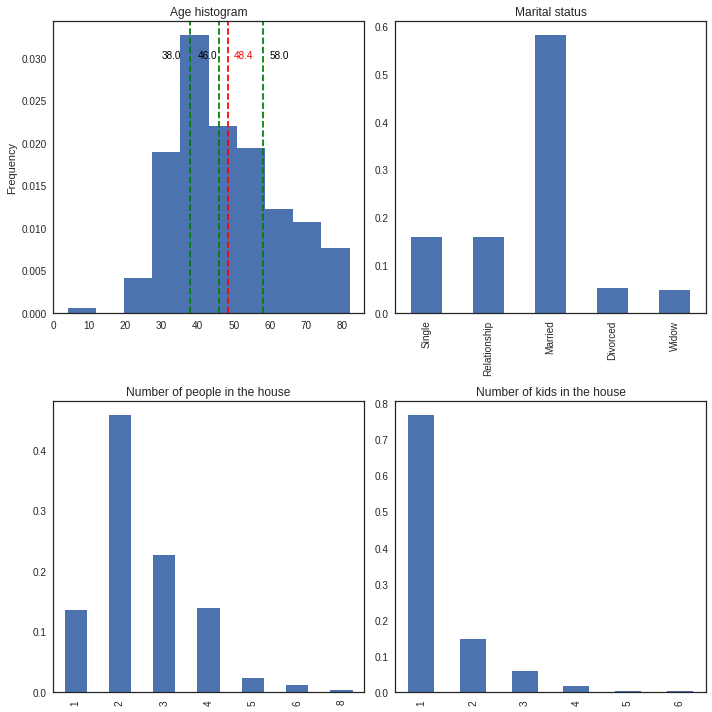

In [14]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
if norm:
    df.p2p_dem__birth.plot(kind='hist',ax=ax[0][0],density=1)
    ax[0][0].text(x=50,y=0.03,s=round(df.p2p_dem__birth.mean(),1),color='r')
    ax[0][0].text(x=40,y=0.03,s=round(df.p2p_dem__birth.median(),1),color='k')
    ax[0][0].text(x=30,y=0.03,s=round(df.p2p_dem__birth.quantile(0.25),1),color='k')
    ax[0][0].text(x=60,y=0.03,s=round(df.p2p_dem__birth.quantile(0.75),1),color='k')
else:
    df.p2p_dem__birth.plot(kind='hist',ax=ax[0][0])
    ax[0][0].text(x=50,y=60,s=round(df.p2p_dem__birth.mean(),1),color='r')
    ax[0][0].text(x=40,y=60,s=round(df.p2p_dem__birth.median(),1),color='k')
    ax[0][0].text(x=30,y=60,s=round(df.p2p_dem__birth.quantile(0.25),1),color='k')
    ax[0][0].text(x=60,y=60,s=round(df.p2p_dem__birth.quantile(0.75),1),color='k')
ax[0][0].set_title('Age histogram')
ax[0][0].axvline(x=df.p2p_dem__birth.mean(),color='r',linestyle='--')
ax[0][0].axvline(x=df.p2p_dem__birth.median(),color='g',linestyle='--')
ax[0][0].axvline(x=df.p2p_dem__birth.quantile(0.25),color='g',linestyle='--')
ax[0][0].axvline(x=df.p2p_dem__birth.quantile(0.75),color='g',linestyle='--')

serie_map(df.p2p_dem_househ_sit.sort_index().value_counts(normalize=norm,sort=False),dict_rel).plot(kind='bar',ax=ax[0][1])
ax[0][1].set_title('Marital status')

df.p2p_dem_househ_size.sort_index().value_counts(normalize=norm,sort=False).plot(kind='bar',ax=ax[1][0])
ax[1][0].set_title('Number of people in the house')


df.p2p_dem_househ_kids.sort_index().value_counts(normalize=norm,sort=False).plot(kind='bar',ax=ax[1][1])
ax[1][1].set_title('Number of kids in the house')
plt.tight_layout()

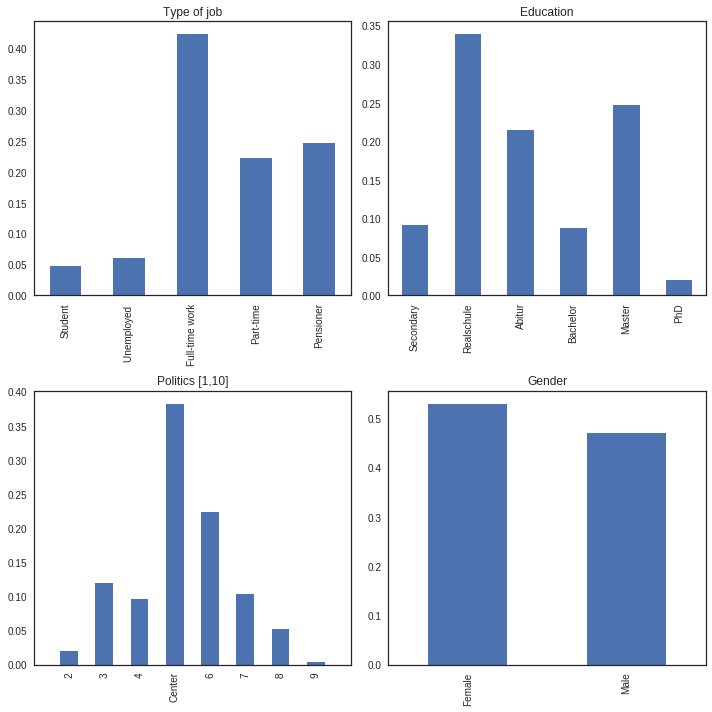

In [27]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,10))

serie_map(df.p2p_dem_activity.sort_index().value_counts(normalize=norm,sort=False),dict_sit).plot(kind='bar',ax=ax[0][0])
ax[0][0].set_title('Type of job')

serie_map(df.p2p_dem_educ.sort_index().value_counts(normalize=norm,sort=False),dict_edu).plot(kind='bar',ax=ax[0][1])
ax[0][1].set_title('Education')
#ax[0][1].text(x=4,y=70,s='A lot of highly \neducated people???',color='r',rotation=90)

serie_map(df.p2p_dem_politics.sort_index().value_counts(sort=False,normalize=norm),dict_pol).plot(kind='bar',ax=ax[1][0])
ax[1][0].set_title('Politics [1,10]')
ax[1][0].set_xlim([-1,8])
#ax[1][0].set_xticks(df.p2p_dem_politics.value_counts().sort_index().index)

#ax[1][0].text(x=0,y=10,s='More left',color='r',rotation=90)
#ax[1][0].text(x=7,y=10,s='More right',color='r',rotation=90)

serie_map(df.p2p_dem_Gender.sort_index().value_counts(sort=False,normalize=norm),dict_gend).plot(kind='bar',ax=ax[1][1])
ax[1][1].set_title('Gender')


plt.tight_layout()

In [39]:
df.p2p_dem_politics.mean()

5.207171314741036

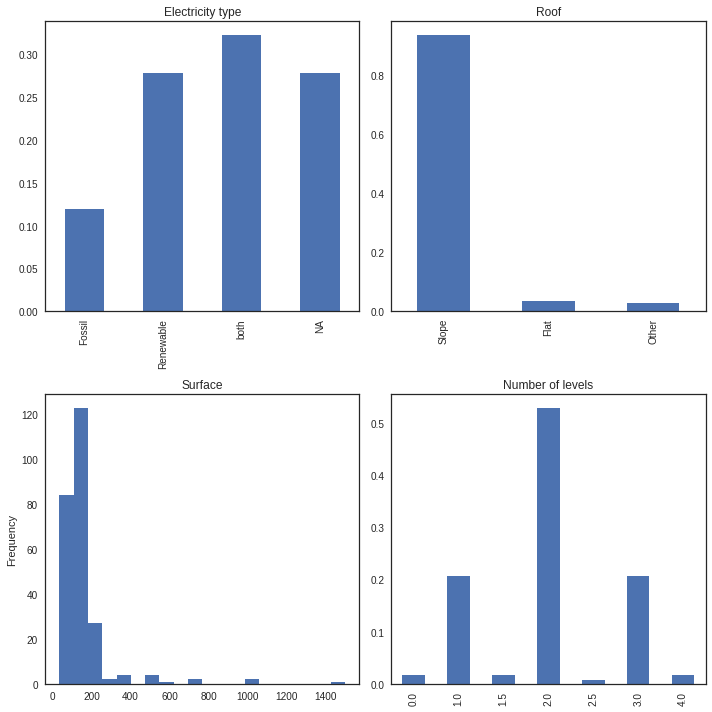

In [17]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
serie_map(df.p2p_dem2_energy.sort_index().value_counts(sort=False,normalize=norm),
          dict_ener).plot(kind='bar',ax=ax[0][0])
ax[0][0].set_title('Electricity type')

serie_map(df.p2p_dem2_roof.sort_index().value_counts(sort=False,normalize=norm),
          dict_roof).plot(kind='bar',ax=ax[0][1])

ax[0][1].set_title('Roof')

df.p2p_dem2_space_1.replace(r'^\s*$', np.nan, regex=True).astype(float).plot(kind='hist',bins=20,ax=ax[1][0])
ax[1][0].set_title('Surface')

df.p2p_dem2_levels.replace(r'^\s*$', np.nan, regex=True).replace('2+KG', 2.5, 
    regex=False).astype(float).value_counts(sort=False,normalize=norm).sort_index().plot(kind='bar',ax=ax[1][1])
ax[1][1].set_title('Number of levels')

plt.tight_layout()


# Environmental awareness

In [18]:
df.P2P_Values_Env_1.sort_index().value_counts(sort=False,normalize=False)

0     1
1     2
2     3
3     5
4    34
5    21
6    58
7    75
8    52
Name: P2P_Values_Env_1, dtype: int64

1. distribution mean and sd x1 or x 2
random regression


In [42]:
print(df.P2P_Values_Env_1.mean())
print(df.P2P_Values_Env_2.mean())
print(df.P2P_Values_Env_3.mean())
print(df.P2P_Values_Env_4.mean())

6.187250996015936
5.924302788844622
6.350597609561753
6.278884462151394


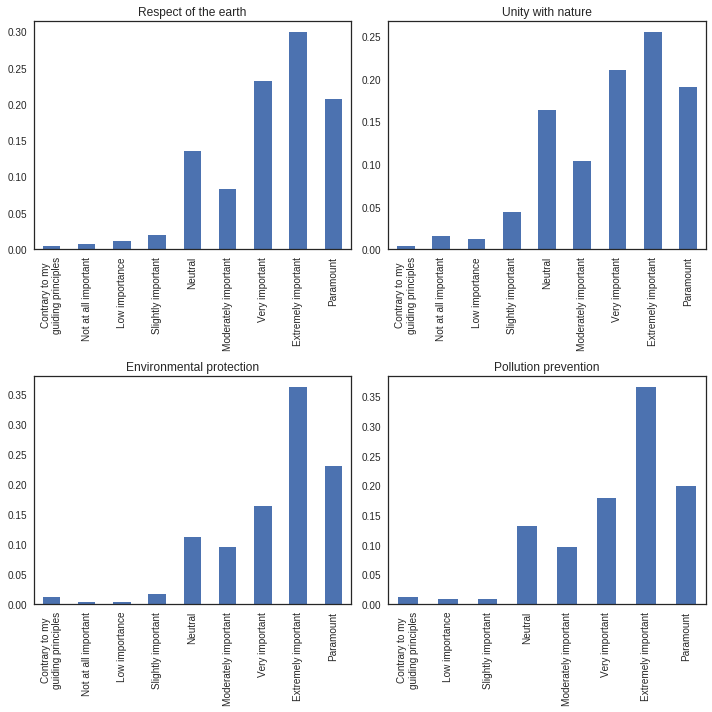

In [19]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
serie_map(df.P2P_Values_Env_1.sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_imp).plot(kind='bar',ax=ax[0][0])
ax[0][0].set_title('Respect of the earth')

serie_map(df.P2P_Values_Env_2.sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_imp).plot(kind='bar',ax=ax[0][1])

ax[0][1].set_title('Unity with nature')

serie_map(df.P2P_Values_Env_3.sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_imp).plot(kind='bar',ax=ax[1][0])
ax[1][0].set_title('Environmental protection')

serie_map(df.P2P_Values_Env_4.sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_imp).plot(kind='bar',ax=ax[1][1])
ax[1][1].set_title('Pollution prevention')

plt.tight_layout()




# Amount of people with PV is reeeally low in this population (34 or 4.8%)

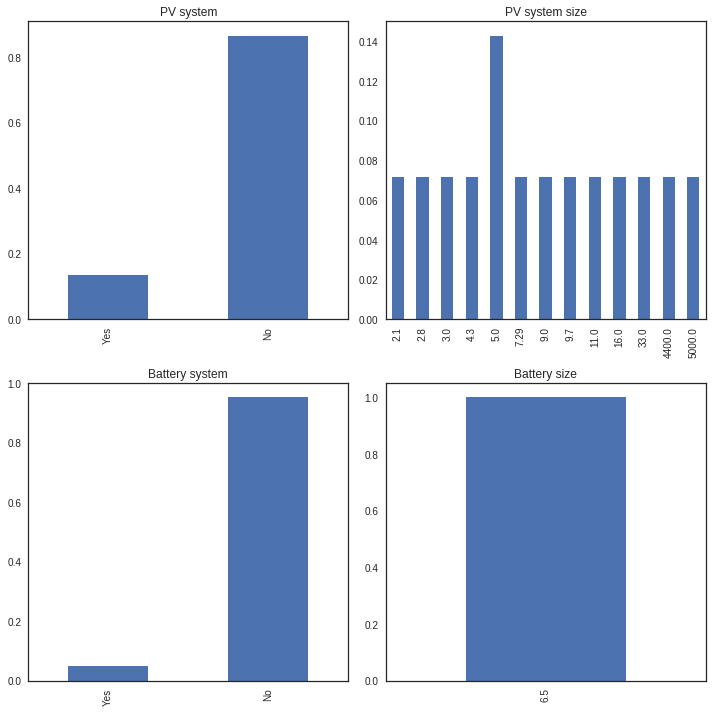

In [20]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
serie_map(df.p2p_dem3_PV.sort_index().value_counts(sort=False,normalize=norm),
          dict_tf).plot(kind='bar',ax=ax[0][0])
ax[0][0].set_title('PV system')

df.p2p_dem3_PV_power_1.replace(r'^\s*$', np.nan, regex=True).replace('?', np.nan, 
    regex=False).astype(float).value_counts(sort=False,normalize=norm).sort_index().plot(kind='bar',ax=ax[0][1])

ax[0][1].set_title('PV system size')

serie_map(df.p2p_dem3_ESS.sort_index().value_counts(sort=False,normalize=norm),
          dict_tf).plot(kind='bar',ax=ax[1][0])
ax[1][0].set_title('Battery system')

df.p2p_dem3_stroage_cap_1.replace(r'^\s*$', np.nan, regex=True).astype(float).value_counts(
    sort=False,normalize=norm).sort_index().plot(kind='bar',ax=ax[1][1])

ax[1][1].set_title('Battery size')


plt.tight_layout()


# --------------------------------------------------------------------

# Intention to acquire technology is unlikely

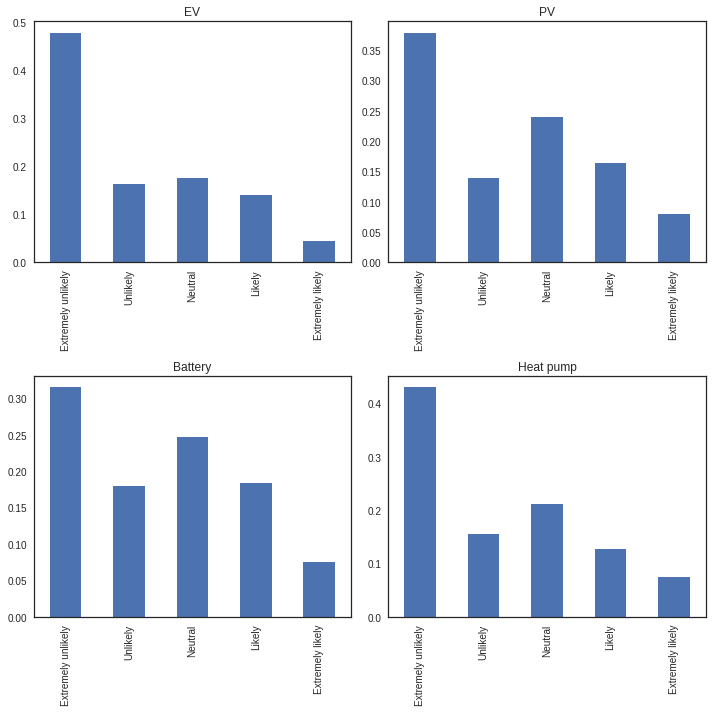

In [21]:
#Wie groß ist Ihre Absicht in den nächsten 5 Jahren folgende Technologien zu erwerben?
#How big is your intention to acquire the following technologies in the next 5 years?
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
serie_map(df.p2p_dem3_technology_1.sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_int).plot(kind='bar',ax=ax[0][0])
ax[0][0].set_title('EV')

serie_map(df.p2p_dem3_technology_2.sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_int).plot(kind='bar',ax=ax[0][1])

ax[0][1].set_title('PV')

serie_map(df.p2p_dem3_technology_3.sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_int).plot(kind='bar',ax=ax[1][0])
ax[1][0].set_title('Battery')

serie_map(df.p2p_dem3_technology_4.sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_int).plot(kind='bar',ax=ax[1][1])
ax[1][1].set_title('Heat pump')
plt.tight_layout()


In [38]:
df.p2p_dem3_technology_4.mean()

2.262948207171315

In [22]:
df.p2p_dem3_technology_2.sort_index().value_counts(sort=False,normalize=False)

1    95
2    35
3    60
4    41
5    20
Name: p2p_dem3_technology_2, dtype: int64

In [23]:
df.p2p_dem3_technology_3.sort_index().value_counts(sort=False,normalize=False)

1    79
2    45
3    62
4    46
5    19
Name: p2p_dem3_technology_3, dtype: int64

Run analysis twice one with unlikely and one without

behavior of extremely unlikely answers, stat tests

# --------------------------------------------------------------------

# Willingness to participate is high (176 vs 75, i.e., 70%)

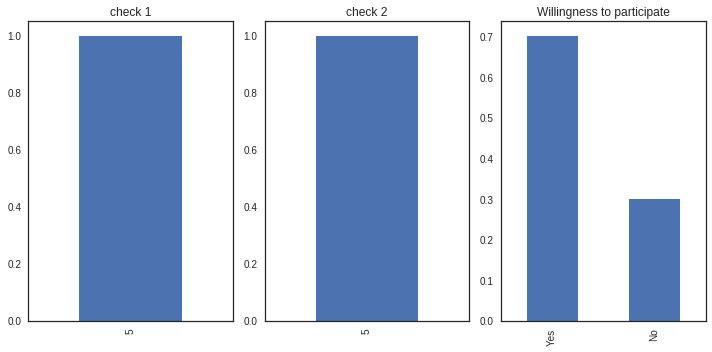

In [24]:

fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(10,5))
df[df.p2p_Filter1==1].p2p_check_forecast.sort_index().value_counts(sort=False,normalize=norm).plot(kind='bar',ax=ax[0])
ax[0].set_title('check 1')

df.p2p_check_forecast2.sort_index().value_counts(sort=False,normalize=norm).plot(kind='bar',ax=ax[1])

ax[1].set_title('check 2')

serie_map(df.p2p_willingness.sort_index().value_counts(sort=False,normalize=norm),
          dict_tf).plot(kind='bar',ax=ax[2])
ax[2].set_title('Willingness to participate')

plt.tight_layout()

In [25]:
df.p2p_willingness.sort_index().value_counts()

1    176
2     75
Name: p2p_willingness, dtype: int64

In [1]:
75/(75+176)

0.29880478087649404

In [31]:
from scipy.stats import ttest_rel,ttest_ind


In [32]:
df.keys()

Index(['Finished', 'p2p_Filter1', 'p2p_dem_Gender', 'p2p_dem__birth',
       'p2p_dem_househ_sit', 'p2p_dem_househ_size', 'p2p_dem_househ_kids',
       'p2p_dem_activity', 'p2p_dem_activity_1_TEXT',
       'p2p_dem_activity_3_TEXT',
       ...
       'P2P_CC_Emo_1', 'P2P_CC_Emo_2', 'P2P_CC_Emo_3', 'P2P_CC_Emo_4',
       'P2P_CC_Emo_5', 'P2P_CC_Emo_6', 'P2P_CC_Emo_7', 'P2P_CC_Emo_8',
       'P2P_CC_Emo_9', 'P2P_CC_Emo_10'],
      dtype='object', length=104)

# Neither Gender, household size, marital status or political are significants for the difference between consumers and prosumers 

In [36]:
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem_Gender'].apply(lambda x:list(x))))

print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem_househ_sit'].apply(lambda x:list(x))))

print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem_househ_size'].apply(lambda x:list(x))))

print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem_politics'].apply(lambda x:list(x))))


Ttest_indResult(statistic=1.1752351013264466, pvalue=0.24102322999933026)
Ttest_indResult(statistic=-0.8270646936446917, pvalue=0.40899227075761124)
Ttest_indResult(statistic=1.1972977047664741, pvalue=0.2323291174829949)
Ttest_indResult(statistic=-1.4558204552521559, pvalue=0.14670191473810928)


In [37]:
ttest_ind(*df.groupby('p2p_willingness')['p2p_dem_activity'].apply(lambda x:list(x))) #Education


Ttest_indResult(statistic=-2.716071845263318, pvalue=0.007069083637690224)

In [38]:
ttest_ind(*df.groupby('p2p_willingness')['p2p_dem_househ_kids'].apply(lambda x:list(x)))


Ttest_indResult(statistic=1.7002206023885764, pvalue=0.09033806381296211)

In [39]:
dict_tf

{1: 'Yes', 2: 'No'}

In [40]:
df.groupby('p2p_willingness')['p2p_dem__birth'].apply(lambda x:list(x))

p2p_willingness
1    [48, 58, 42, 72, 47, 58, 56, 56, 54, 49, 27, 6...
2    [68, 41, 53, 70, 45, 50, 46, 38, 63, 58, 44, 6...
Name: p2p_dem__birth, dtype: object

In [41]:
df.groupby('p2p_willingness')['p2p_dem__birth'].mean()

p2p_willingness
1    49.420455
2    45.960000
Name: p2p_dem__birth, dtype: float64

In [42]:
ttest_ind(*df.groupby('p2p_willingness')['p2p_dem__birth'].apply(lambda x:list(x)))


Ttest_indResult(statistic=1.759554725698209, pvalue=0.07971136167069845)

In [43]:
ttest_ind(*df.groupby('p2p_willingness')['p2p_dem__birth'].apply(lambda x:list(x)))


Ttest_indResult(statistic=1.759554725698209, pvalue=0.07971136167069845)

In [44]:
ttest_ind(*df.groupby('p2p_willingness')['p2p_dem__birth'].apply(lambda x:list(x)))


Ttest_indResult(statistic=1.759554725698209, pvalue=0.07971136167069845)

# Reasons why you cannot imagine participating in community

A big amount of responses are because they want to remain independent (????), others are just satisfied with the supplier or believe the system is too complicated. Other reasons (less frequent) are lack of trust, lack of info about who they are trading with or just do not want to trade. 

In [48]:
df.shape


(251, 104)

In [52]:
df.p2p_willingn_reasons_4.replace(r'^\s*$', np.nan, regex=True).sum()/251

0.06772908366533864

Text(0, 0.5, 'Frequency')

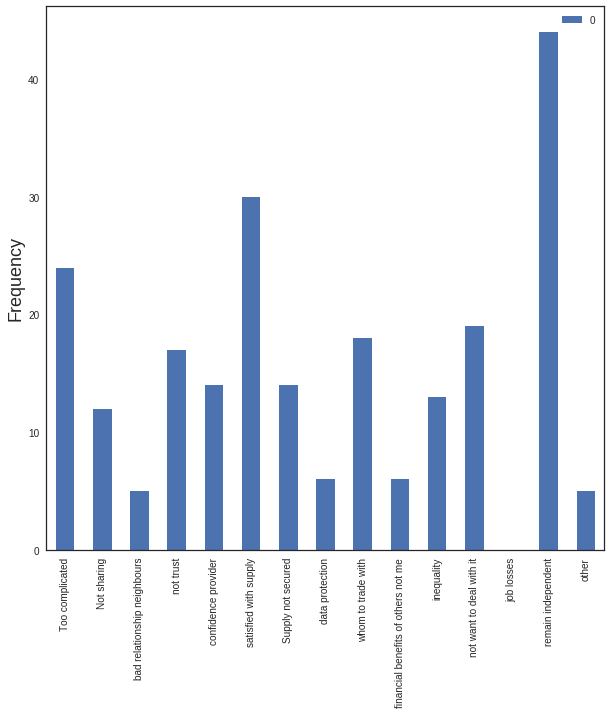

In [45]:
tmp=pd.DataFrame()
tmp.loc[0,'Too complicated']=df.p2p_willingn_reasons_1.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'Not sharing']=df.p2p_willingn_reasons_2.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'bad relationship neighbours']=df.p2p_willingn_reasons_3.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'not trust']=df.p2p_willingn_reasons_4.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'confidence provider']=df.p2p_willingn_reasons_5.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'satisfied with supply']=df.p2p_willingn_reasons_6.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'Supply not secured']=df.p2p_willingn_reasons_7.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'data protection']=df.p2p_willingn_reasons_8.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'whom to trade with']=df.p2p_willingn_reasons_9.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'financial benefits of others not me']=df.p2p_willingn_reasons_10.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'inequality']=df.p2p_willingn_reasons_11.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'not want to deal with it']=df.p2p_willingn_reasons_12.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'job losses']=df.p2p_willingn_reasons_13.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'remain independent']=df.p2p_willingn_reasons_14.replace(r'^\s*$', np.nan, regex=True).sum()
tmp.loc[0,'other']=df.p2p_willingn_reasons_15.replace(r'^\s*$', np.nan, regex=True).sum()

fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(10,10),sharex=True)
tmp.T.plot(kind='bar',ax=ax)
ax.set_ylabel('Frequency',size=18)

In [46]:
tmp/75

,Too complicated,Not sharing,bad relationship neighbours,not trust,confidence provider,satisfied with supply,Supply not secured,data protection,whom to trade with,financial benefits of others not me,inequality,not want to deal with it,job losses,remain independent,other
0,0.32,0.16,0.066667,0.226667,0.186667,0.4,0.186667,0.08,0.24,0.08,0.173333,0.253333,0.0,0.586667,0.066667


Independency: remain ind+not sharing? = 0.5866+0.16=0.7466

Complexity: too complicated +  not want to deal with it=0.32+0.2533=0.5733

Supply satisfaction: Supply satisfaction and confidence provider=0.4+0.1866 =0.5866

In [47]:
0.1866+0.4

0.5866

In [48]:
.1866+0.2266

0.4132

In [49]:
.5866+.16

0.7466

PV owners remain independent?
answer affirmative at least at one of them

# Trading

# Risk and trade

Of those trading, most of them are familiar with trading and have a slight inclination to trade

risk aversion vs not want to be part of it, and PV/battery owners

## Q1: Are there statistically significant differences on risk aversion by willingness to participate in the P2P community?

In [50]:
import scipy

In [51]:
stat, p = scipy.stats.shapiro(df.loc[df.p2p_willingness==1,'p2p_dem4_risk'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The null hypothesis that the data are normally distributed cannot be rejected')
else:
    print('The null hypothesis that the data are normally distributed is REJECTED')

Statistics=0.948, p=0.000
The null hypothesis that the data are normally distributed is REJECTED


In [52]:
stat, p = scipy.stats.shapiro(df.loc[df.p2p_willingness==2,'p2p_dem4_risk'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The null hypothesis that the data are normally distributed cannot be rejected')
else:
    print('The null hypothesis that the data are normally distributed is REJECTED')

Statistics=0.938, p=0.001
The null hypothesis that the data are normally distributed is REJECTED


In both cases, the distribution is not normally distributed, thus a non-parametric test should be used. In this case we use Mann-Whitney U test. The Mann-Whitney U test is the non-parametric equivalent to the independent t-test and the appropriate analysis to compare differences that come from the same population when the dependent variable is ordinal. The Mann-Whitney U test compares the number of times a score from one sample is ranked higher than a score from another sample.  The scores from both samples will be ranked together; rank 1 is used for the lowest score, rank 2 for the next lowest score, and so on. When scores have the same value, a tie is determined.  The scores are ranked and those ranks are added together and then divided by the number of scores. Each of the tied scores is then assigned the same ranking (Cramer, 1998).  Once the data is ranked, calculations will be carried out on the ranks.  Given the nonparametric nature of this statistical analysis, there are fewer assumptions to assess.  The data must come from random samples of the population,  the data are independent, meaning that scores from one participant are not dependent on scores of the others,  and the measure of the two samples have at least an ordinal scale of measurement (Brace, Kemp & Sneglar, 2006).

In [53]:
stat, p = scipy.stats.mannwhitneyu(df.loc[df.p2p_willingness==1,'p2p_dem4_risk'],df.loc[df.p2p_willingness==2,'p2p_dem4_risk'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('There are statistically significant differences on risk aversion by willingness to participate in the P2P community.')
    


Statistics=5213.000, p=0.004
There are statistically significant differences on risk aversion by willingness to participate in the P2P community.


In [54]:
df.loc[df.p2p_willingness==1,'p2p_dem4_risk'].mean()

5.704545454545454

In [55]:
df.loc[df.p2p_willingness==2,'p2p_dem4_risk'].mean()

4.773333333333333

## Answer: Yes, there are statistically significant differences on risk aversion by willingness to participate in the P2P community, being the group that expressed its willingness to participate in the project more risk  taker than the group that expressed no interest on the community.

## Q2: Are there statistically significant differences on risk aversion by ownership of PV?

In [56]:
stat, p = scipy.stats.shapiro(df.loc[df.p2p_dem3_PV==1,'p2p_dem4_risk'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The null hypothesis that the data are normally distributed cannot be rejected')
else:
    print('The null hypothesis that the data are normally distributed is REJECTED')

Statistics=0.930, p=0.032
The null hypothesis that the data are normally distributed is REJECTED


In [57]:
stat, p = scipy.stats.shapiro(df.loc[df.p2p_dem3_PV==2,'p2p_dem4_risk'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The null hypothesis that the data are normally distributed cannot be rejected')
else:
    print('The null hypothesis that the data are normally distributed is REJECTED')

Statistics=0.949, p=0.000
The null hypothesis that the data are normally distributed is REJECTED


In [58]:
stat, p = scipy.stats.mannwhitneyu(df.loc[df.p2p_dem3_PV==1,'p2p_dem4_risk'],df.loc[df.p2p_dem3_PV==2,'p2p_dem4_risk'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('There are statistically significant differences on risk aversion by willingness to participate in the P2P community.')
    


Statistics=3532.000, p=0.344
Same distribution (fail to reject H0)


In [59]:
df.loc[df.p2p_dem3_PV==1,'p2p_dem4_risk'].mean()

5.588235294117647

In [60]:
df.loc[df.p2p_dem3_PV==2,'p2p_dem4_risk'].mean()

5.400921658986175

## Answer: No, there are not statistically significant differences on risk aversion by PV ownership.

In [40]:
df.p2p_dem4_risk.mean()

5.426294820717131

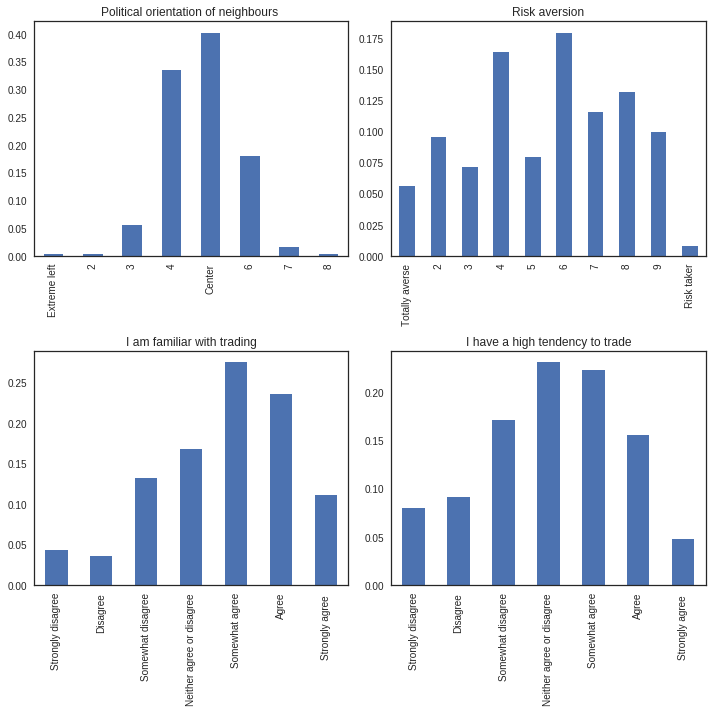

In [61]:
#Wir bitten Sie auf einer Skala von 1 (stimme gar nicht zu) bis 7 (stimme vollkommen zu) 
#anzugeben, inwiefern Sie den nachfolgenden Aussagen über Ihre Nachbarschaft zustimmen bzw. diese ablehnen. 
#how much you agree or disagree with the following statements about your neighborhood.
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
serie_map(df.p2p_Nei_Pol.value_counts(sort=False,normalize=norm).sort_index(),
          dict_pol).plot(kind='bar',ax=ax[0][0])
ax[0][0].set_title('Political orientation of neighbours ')


serie_map(df.p2p_dem4_risk.sort_index().value_counts(sort=False,normalize=norm),
          dict_risk).plot(kind='bar',ax=ax[0][1])
ax[0][1].set_title('Risk aversion')
serie_map(df.loc[:,'p2p_Nei_attach_1.0'].sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_agr).plot(kind='bar',ax=ax[1][0])
ax[1][0].set_title('I am familiar with trading')

serie_map(df.loc[:,'p2p_Nei_attach_2.0'].sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_agr).plot(kind='bar',ax=ax[1][1])
ax[1][1].set_title('I have a high tendency to trade')
#fig.suptitle('My neighborhood',size=18)
plt.tight_layout()





In [62]:
(df.loc[:,'p2p_Nei_attach_1.0'].sort_index().value_counts(sort=False,normalize=False)/251*100)[4:].sum()

62.15139442231075

In [63]:
df.loc[:,'p2p_Nei_attach_2.0'].sort_index().value_counts(sort=False,normalize=norm)[4:].sum()*100

42.62948207171315

# -------------------------------------------------------

In [64]:
new_cols=['p2p_dec_4c30S_12h','p2p_dec_4c30s_12h+','p2p_dec_4c60S_12h','p2p_dec_4c60s_12h+', 'p2p_dec_4c90S_12h','p2p_dec_4c90s_12h+',
       'p2p_dec_12c30S_12h', 'p2p_dec_12c30s_12h+', 'p2p_dec_12c60S_12h','p2p_dec_12c60s_12h+', 'p2p_dec_12c90S_12h','p2p_dec_12c90s_12h+',
       'p2p_dec_20c30S_12h', 'p2p_dec_20c30s_12h+', 'p2p_dec_20c60S_12h', 'p2p_dec_20c60s_12h+','p2p_dec_20c90S_12h','p2p_dec_20c90s_12h+',
       'p2p_dec_28c30S_12h', 'p2p_dec_28c30s_12h+', 'p2p_dec_28c60S_12h','p2p_dec_28c60s_12h+', 'p2p_dec_28c90S_12h','p2p_dec_28c90s_12h+']

In [65]:
df[df.p2p_willingness==1].shape[0]

176

In [66]:
if norm:
    df_core=pd.DataFrame([(df.loc[df.p2p_willingness==1,new_cols]==1).sum()/df[df.p2p_willingness==1].shape[0],np.zeros(24),np.zeros(24),np.zeros(24)]).T
else:
    df_core=pd.DataFrame([(df.loc[df.p2p_willingness==1,new_cols]==1).sum(),np.zeros(24),np.zeros(24),np.zeros(24)]).T

In [67]:
df_core.columns=['Sell','Price','SOC', 'sp']

In [68]:
for price in ['4c','12c','20c','28c']:

    list_cents=[col for col in df_core.index if price in col]
    df_core.loc[list_cents,'Price']=int(price[:-1])
for soc in [30,60,90]:

    list_soc=[col for col in df_core.index if str(soc) in col]
    df_core.loc[list_soc,'SOC']=soc
for sp in ['12h','12h+']:

    list_sp=[col for col in df_core.index if sp in col]
    df_core.loc[list_sp,'sp']=sp


In [73]:
df_core.to_csv('../Input/df_core.csv')

In [74]:
df_core

,Sell,Price,SOC,sp
p2p_dec_4c30S_12h,0.096591,4.0,30.0,12h
p2p_dec_4c30s_12h+,0.062500,4.0,30.0,12h+
p2p_dec_4c60S_12h,0.255682,4.0,60.0,12h
p2p_dec_4c60s_12h+,0.170455,4.0,60.0,12h+
p2p_dec_4c90S_12h,0.511364,4.0,90.0,12h
p2p_dec_4c90s_12h+,0.380682,4.0,90.0,12h+
p2p_dec_12c30S_12h,0.227273,12.0,30.0,12h
p2p_dec_12c30s_12h+,0.113636,12.0,30.0,12h+
p2p_dec_12c60S_12h,0.517045,12.0,60.0,12h
p2p_dec_12c60s_12h+,0.363636,12.0,60.0,12h+


In [75]:
df_core.shape

(24, 4)

In [76]:
import os


In [77]:
os.listdir()

['__pycache__',
 'P2P_functions.py',
 'peak_50_50_DE_0.25_100_1000_tidy.csv',
 'flexible_P3.ipynb',
 'flexible_P3_multiple.ipynb',
 'peak_50_50_DE_0.25_100_1000.csv',
 '__init__.py',
 'day_50_50_DE_0.25_100_1000.csv',
 'Graphs_P3.R',
 'week_50_50_DE_0.25_100_1000.csv',
 '.ipynb_checkpoints',
 'df_core.csv',
 'Survey_results_19032020.ipynb',
 'df_50_50_DE_0.25_100_1000.csv']

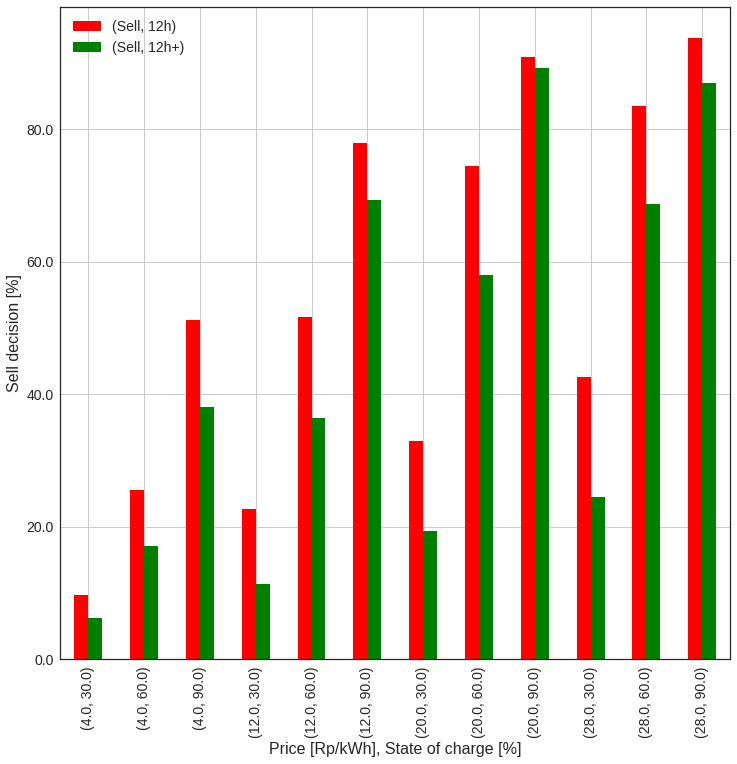

In [78]:
fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(12,12))

(df_core.groupby([df_core.Price,df_core.SOC,df_core.sp]).sum()*100).unstack().plot(by=df_core.Price,kind='bar',color=['r', 'g'],ax=ax)
ax.set_ylabel('Sell decision [%]',size=16)
ax.set_xlabel('Price [Rp/kWh], State of charge [%]',size=16)
ax.set_yticklabels(ax.get_yticks().round(1),size=14)
ax.set_xticklabels(ax.get_xticklabels(),size=14)
ax.legend(prop={'size': 14})
ax.grid()

#fig.savefig('../Img/sell.png',format='png',transparent=False)

In [79]:
bhv_hh=pd.DataFrame(itertools.product(df_core.Price.unique(),df_core.SOC.unique(),df_core.sp.unique(),df.index),columns=['Price','SOC','surplus_time','hh'])

In [80]:
bhv_hh['sell']=False

In [81]:
bhv_hh.loc[:,'sell']=(df.loc[:,new_cols]==1).unstack().values

In [82]:
df.loc[df.p2p_willingness==1].index

Int64Index([  1,   2,   3,   4,   5,   7,   9,  10,  11,  12,
            ...
            235, 236, 237, 240, 241, 242, 245, 247, 248, 250],
           dtype='int64', length=176)

In [83]:
hh_will=[i for i in bhv_hh.hh.unique() if i in df.loc[df.p2p_willingness==1].index]

In [84]:
bhv_hh.loc[~bhv_hh.hh.isin(hh_will),'will']=False
bhv_hh.loc[bhv_hh.hh.isin(hh_will),'will']=True


In [85]:
bhv_hh.to_csv('../Output/table_bhv.csv')

In [86]:
bhv_hh

,Price,SOC,surplus_time,hh,sell,will
0,4.0,30.0,12h,0,False,False
1,4.0,30.0,12h,1,False,True
2,4.0,30.0,12h,2,False,True
3,4.0,30.0,12h,3,False,True
4,4.0,30.0,12h,4,True,True
5,4.0,30.0,12h,5,False,True
6,4.0,30.0,12h,6,False,False
7,4.0,30.0,12h,7,False,True
8,4.0,30.0,12h,8,False,False
9,4.0,30.0,12h,9,False,True


In [87]:
df_core.groupby([df_core.Price,df_core.SOC,df_core.sp]).sum().unstack()


Sell          
sp               12h      12h+
Price SOC                     
4.0   30.0  0.096591  0.062500
      60.0  0.255682  0.170455
      90.0  0.511364  0.380682
12.0  30.0  0.227273  0.113636
      60.0  0.517045  0.363636
      90.0  0.778409  0.693182
20.0  30.0  0.329545  0.193182
      60.0  0.744318  0.579545
      90.0  0.909091  0.892045
28.0  30.0  0.426136  0.244318
      60.0  0.835227  0.687500
      90.0  0.937500  0.869318

In [94]:
df_core.groupby([df_core.Price,df_core.SOC,df_core.sp]).sum()

Sell
Price SOC  sp            
4.0   30.0 12h   0.096591
           12h+  0.062500
      60.0 12h   0.255682
           12h+  0.170455
      90.0 12h   0.511364
           12h+  0.380682
12.0  30.0 12h   0.227273
           12h+  0.113636
      60.0 12h   0.517045
           12h+  0.363636
      90.0 12h   0.778409
           12h+  0.693182
20.0  30.0 12h   0.329545
           12h+  0.193182
      60.0 12h   0.744318
           12h+  0.579545
      90.0 12h   0.909091
           12h+  0.892045
28.0  30.0 12h   0.426136
           12h+  0.244318
      60.0 12h   0.835227
           12h+  0.687500
      90.0 12h   0.937500
           12h+  0.869318

# ---------------------------------------------------------------------------------------------------

# Neighbours influence

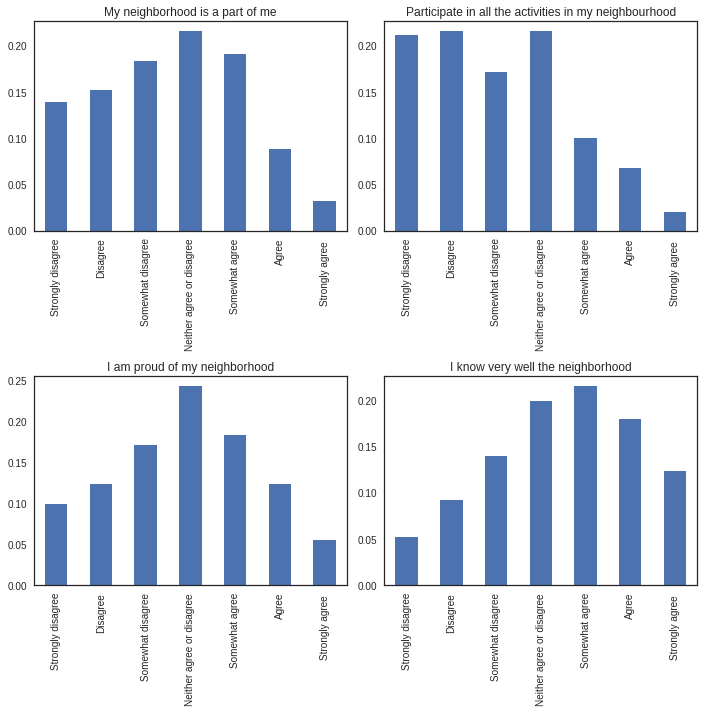

In [90]:
#Wir bitten Sie auf einer Skala von 1 (stimme gar nicht zu) bis 7 (stimme vollkommen zu) 
#anzugeben, inwiefern Sie den nachfolgenden Aussagen über Ihre Nachbarschaft zustimmen bzw. diese ablehnen. 
#how much you agree or disagree with the following statements about your neighborhood.
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
serie_map(df.p2p_Nei_attach_1.sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_agr).plot(kind='bar',ax=ax[0][0])
ax[0][0].set_title('My neighborhood is a part of me')

serie_map(df.p2p_Nei_attach_2.sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_agr).plot(kind='bar',ax=ax[0][1])

ax[0][1].set_title('Participate in all the activities in my neighbourhood')

serie_map(df.p2p_Nei_attach_3.sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_agr).plot(kind='bar',ax=ax[1][0])
ax[1][0].set_title('I am proud of my neighborhood')

serie_map(df.p2p_Nei_attach_6.sort_index().value_counts(sort=False,normalize=norm),
          dict_likert_agr).plot(kind='bar',ax=ax[1][1])
ax[1][1].set_title('I know very well the neighborhood')
#fig.suptitle('My neighborhood',size=18)
plt.tight_layout()




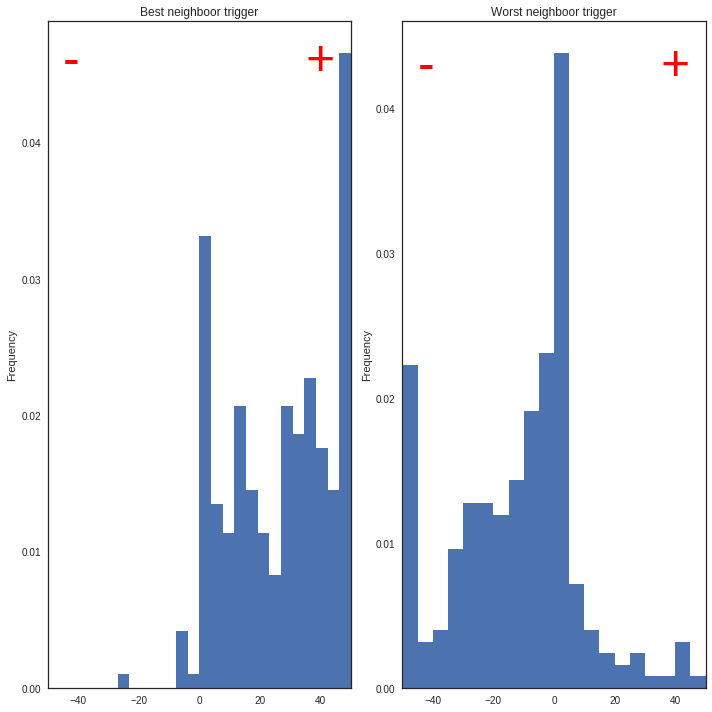

In [91]:
# To what extent does this person trigger emotions in you? 
#You can select any level of strong negative emotions to strong positive emotions by moving the slider.
x_pos1=-45
x_pos3=35
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,10))
if norm:
    df.p2p_Emo_Nei_1.plot(kind='hist',ax=ax[0],density=1, bins=20)
    df.p2p_Emo_Nei_2.plot(kind='hist',ax=ax[1],density=1, bins=20)
    ax[0].text(x=x_pos1,y=0.045,s='-',color='r', size=50)
    ax[0].text(x=x_pos3,y=0.045,s='+',color='r', size=50)
    ax[1].text(x=x_pos1,y=0.042,s='-',color='r', size=50)
    ax[1].text(x=x_pos3,y=0.042,s='+',color='r', size=50)
else:
    df.p2p_Emo_Nei_1.plot(kind='hist',ax=ax[0], bins=20)
    df.p2p_Emo_Nei_2.plot(kind='hist',ax=ax[1], bins=20)
    
    ax[0].text(x=x_pos1,y=45,s='-',color='r', size=50)
    ax[0].text(x=x_pos3,y=45,s='+',color='r', size=50)
    ax[1].text(x=x_pos1,y=53,s='-',color='r', size=50)
    ax[1].text(x=x_pos3,y=53,s='+',color='r', size=50)
ax[0].set_title('Best neighboor trigger')
ax[1].set_title('Worst neighboor trigger')
ax[0].set_xlim([-50,50])
ax[1].set_xlim([-50,50])
plt.tight_layout()

